In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/matchdata/mw_pw_profiles.csv')
df.head()

/tmp/ipykernel_35/2447218756.py:1: DtypeWarning: Columns (32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/matchdata/mw_pw_profiles.csv')
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pan

,player_id,match_id,gender,balls_per_over,start_date,series_name,match_type,name_x,runs_scored,player_out,...,key_pulse,key_pulse_2,full_name,batting_style,bowling_style,playing_role,teams,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,00015688,1158348,female,6,2018-08-21,Botswana Cricket Association Women's T20I Series,T20,M King,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],5,8,17
1,00015688,1182644,female,6,2019-05-05,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],3,0,7
2,00015688,1275107,female,6,2021-09-09,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],1,0,5
3,00015688,1275113,female,6,2021-09-15,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,0,4
4,00015688,1275125,female,6,2021-09-14,ICC Women's T20 World Cup Africa Region Qualifier,T20,M King,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[],-5,0,-1


In [3]:
match_types = df['match_type'].unique()
print("Unique match types:", match_types)

# Create separate dataframes for each match type
match_type_dfs = {}
for match_type in match_types:
  match_type_dfs[match_type] = df[df['match_type'] == match_type].copy()

# Example of accessing a specific dataframe (e.g., for 'TypeA')
# df_type_a = match_type_dfs['TypeA']

Unique match types: ['T20' 'IT20' 'ODM' 'MDM' 'Test' 'ODI']


In [4]:
df_ipl = df[df['series_name'] == 'Indian Premier League'].copy()

In [5]:
df_odi = match_type_dfs['ODI']

In [6]:
# checking if any null data is present (runs scored must be a valid whole number)
df['runs_scored'].isnull().sum()

0

# LINEAR REGRESSION - MULTIPLE

In [7]:
from sklearn.model_selection import train_test_split

X = df_ipl[['runs_scored', 'fours_scored', 'balls_faced']]
y = df_ipl['fantasy_score_batting']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# TRAIN
# Input feature matrix
X_design = np.column_stack([
    np.ones(len(X_train)),
    X_train['runs_scored'].values,       
    X_train['fours_scored'].values,
    X_train['balls_faced'].values
])
# y-matrix target
y = y_train.values.reshape(-1, 1)

# TEST
X_test_design = np.column_stack([
    np.ones(len(X_test)),
    X_test['runs_scored'].values,        
    X_test['fours_scored'].values,
    X_test['balls_faced'].values
])
y_test_vals = y_test.values.reshape(-1, 1)

In [9]:
# Compute X^T X
XtX = X_design.T @ X_design

# Compute (X^T X)^-1
XtX_inv = np.linalg.inv(XtX)

# Compute X^T y
Xty = X_design.T @ y

# Compute weights (w) using formula theta = inverse(XTX)XTy
w_ipl = XtX_inv @ Xty

w_ipl

array([[-0.14783884],
       [ 1.63928718],
       [ 0.03196038],
       [-0.4338282 ]])

In [10]:
y_pred = X_test_design @ w_ipl
y_pred

array([[-0.14783884],
       [96.63730731],
       [12.83832819],
       ...,
       [-0.14783884],
       [-0.14783884],
       [-0.14783884]])

In [11]:
#V Kohli (299159), RCB vs MI 
# Actual batting fantasy store: 79
# Predicted: 80.82
ex_ipl = np.array([[1, 62, 5, 48]])
y1 = ex_ipl @ w_ipl
y1

array([[80.82401507]])

In [12]:
# Multiple Linear Regression Results
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test_vals, y_pred))
r2 = r2_score(y_test_vals, y_pred)
print("R2: ", r2)
print("RMSE: ", rmse)

R2:  0.9938308070871049
RMSE:  2.1604127752194056


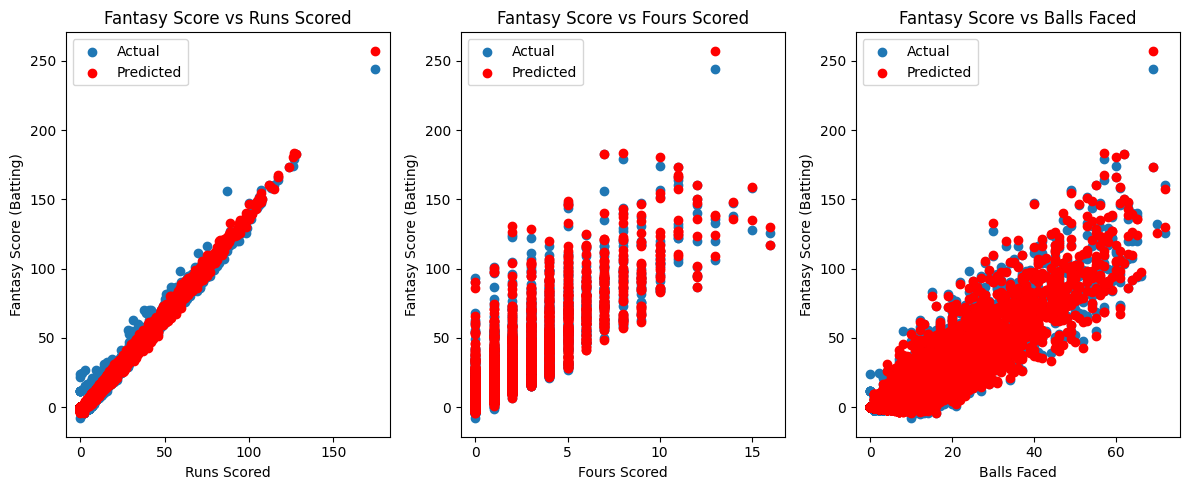

In [13]:
# Visualization for one variable vs prediction
plt.figure(figsize=(12, 5))

# Plotting runs_scored vs fantasy_score_batting with predictions
plt.subplot(1, 3, 1)
plt.scatter(X_test['runs_scored'].values, y_test_vals, label='Actual')
plt.scatter(X_test['runs_scored'].values, y_pred, color='red', label='Predicted')
plt.xlabel('Runs Scored')
plt.ylabel('Fantasy Score (Batting)')
plt.title('Fantasy Score vs Runs Scored')
plt.legend()

# Plotting fours_scored vs fantasy_score_batting with predictions
plt.subplot(1, 3, 2)
plt.scatter(X_test['fours_scored'].values, y_test_vals, label='Actual')
plt.scatter(X_test['fours_scored'].values, y_pred, color='red', label='Predicted')
plt.xlabel('Fours Scored')
plt.ylabel('Fantasy Score (Batting)')
plt.title('Fantasy Score vs Fours Scored')
plt.legend()

# Plotting balls_faced vs fantasy_score_batting with predictions
plt.subplot(1, 3, 3)
plt.scatter(X_test['balls_faced'].values, y_test_vals, label='Actual')
plt.scatter(X_test['balls_faced'].values, y_pred, color='red', label='Predicted')
plt.xlabel('Balls Faced')
plt.ylabel('Fantasy Score (Batting)')
plt.title('Fantasy Score vs Balls Faced')
plt.legend()

plt.tight_layout()
plt.show()

# Polynomial Regression
Input = wickets taken(cubic)

Output = Fantasy score bowling

In [14]:
from sklearn.model_selection import train_test_split

# X is your feature(s), y is your target
X = df_odi[['balls_bowled', 'dot_balls_as_bowler', 'wickets_taken']]            
y = df_odi['fantasy_score_bowling']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# TRAIN
# Input feature matrix
X_design = np.column_stack([
    np.ones(len(X_train)),          # x^0 = 1 (bias term)
    X_train['wickets_taken'].values,         # x^1
    X_train['wickets_taken'].values ** 2,
    X_train['wickets_taken'].values ** 3
])
# y-matrix target
y = y_train.values.reshape(-1, 1)

# TEST
X_test_design = np.column_stack([
    np.ones(len(X_test)),
    X_test['wickets_taken'].values,         # x^1
    X_test['wickets_taken'].values ** 2,
    X_test['wickets_taken'].values ** 3
])
y_test_vals = y_test.values.reshape(-1, 1)

In [16]:
# Compute X^T X
XtX = X_design.T @ X_design

# Compute (X^T X)^-1
XtX_inv = np.linalg.inv(XtX)

# Compute X^T y
Xty = X_design.T @ y

# Compute weights (w) using formula theta = inverse(XTX)XTy
w = XtX_inv @ Xty

w

array([[ 4.25261602],
       [27.878116  ],
       [ 0.12698653],
       [ 0.05775392]])

In [17]:
y_pred = X_test_design @ w
y_pred

array([[32.31547247],
       [32.31547247],
       [ 4.25261602],
       ...,
       [ 4.25261602],
       [ 4.25261602],
       [ 4.25261602]])

In [18]:
# example for row 613
ex = np.array([[1, 61, 38**2, 1]])
y1 = ex @ w
y1

array([[1888.24399694]])

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test_vals, y_pred))
r2 = r2_score(y_test_vals, y_pred)
print("R2: ", r2)
print("RMSE: ", rmse)

R2:  0.9430139412486624
RMSE:  7.300236500090671


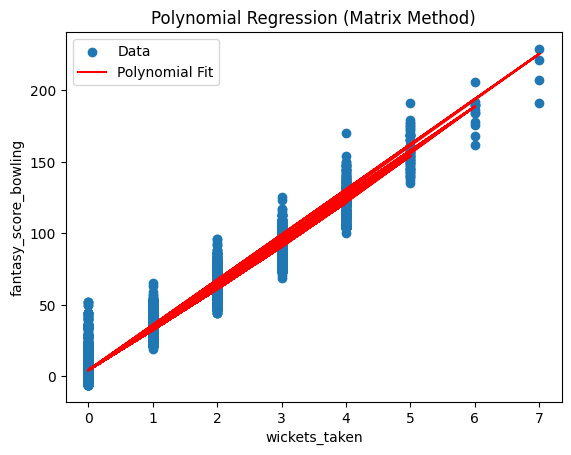

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X_test['wickets_taken'].values, y_test_vals, label="Data")
plt.plot(X_test['wickets_taken'].values, y_pred, color='red', label="Polynomial Fit")
plt.xlabel("wickets_taken")
plt.ylabel("fantasy_score_bowling")
plt.legend()
plt.title("Polynomial Regression (Matrix Method)")
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416712 entries, 0 to 416711
Data columns (total 58 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   player_id              416712 non-null  object 
 1   match_id               416712 non-null  object 
 2   gender                 416712 non-null  object 
 3   balls_per_over         416712 non-null  int64  
 4   start_date             416712 non-null  object 
 5   series_name            414752 non-null  object 
 6   match_type             416712 non-null  object 
 7   name_x                 416712 non-null  object 
 8   runs_scored            416712 non-null  int64  
 9   player_out             416712 non-null  int64  
 10  balls_faced            416712 non-null  int64  
 11  fours_scored           416712 non-null  int64  
 12  sixes_scored           416712 non-null  int64  
 13  catches_taken          416712 non-null  int64  
 14  run_out_direct         416712 non-nu

In [28]:
df.player_id.nunique()

11771